# Crime dataset

## Loading packages and dataset

In [1]:
# To support both python 2 and python 3 
from __future__ import division, print_function, unicode_literals


# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sb  
import math 

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [6]:
PATH ="/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/PCA"
os.chdir(PATH)
cwd=os.getcwd()
print('current path directory is:', cwd)

current path directory is: /Users/clement.guiraud/Desktop/Data analysis/Data analysis track/PCA


In [8]:
df=pd.read_csv('crime.dat', index_col = 0, sep = " ")
df.head()

,meurtre,viol,volmainarmee,agression,voleffraction,volalatire,effracoderoute
netats,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [5]:
# if fanalysis is already installed, import it - else install and import it
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

In [6]:
# print dataset summary
print(df.info())

# define dimensions of [X] matrix : number of variables
p = df.shape[1]

# define sample size of [X] : number of observations
n = df.shape[0]

# define values of matrix [X]
X = df.values

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meurtre         50 non-null     float64
 1   viol            50 non-null     float64
 2   volmainarmee    50 non-null     float64
 3   agression       50 non-null     float64
 4   voleffraction   50 non-null     float64
 5   volalatire      50 non-null     float64
 6   effracoderoute  50 non-null     float64
dtypes: float64(7)
memory usage: 3.1+ KB
None


In [7]:
# import PCA module from fanalysis package
from fanalysis.pca import PCA

# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=df.index,col_labels=df.columns)

# run PCA on X observed data
acp.fit(X)

# print methods and attributes of acp object
print(dir(acp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'col_contrib_', 'col_coord_', 'col_cor_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'correlation_circle', 'eig_', 'eigen_vectors_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'means_', 'model_', 'n_components', 'n_components_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'row_contrib_', 'row_coord_'

In [8]:
acp.col_labels

Index(['meurtre', 'viol', 'volmainarmee', 'agression', 'voleffraction',
       'volalatire', 'effracoderoute'],
      dtype='object')

In [9]:
acp.row_labels

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='netats')

## Determining whether variables are positively correlated or not

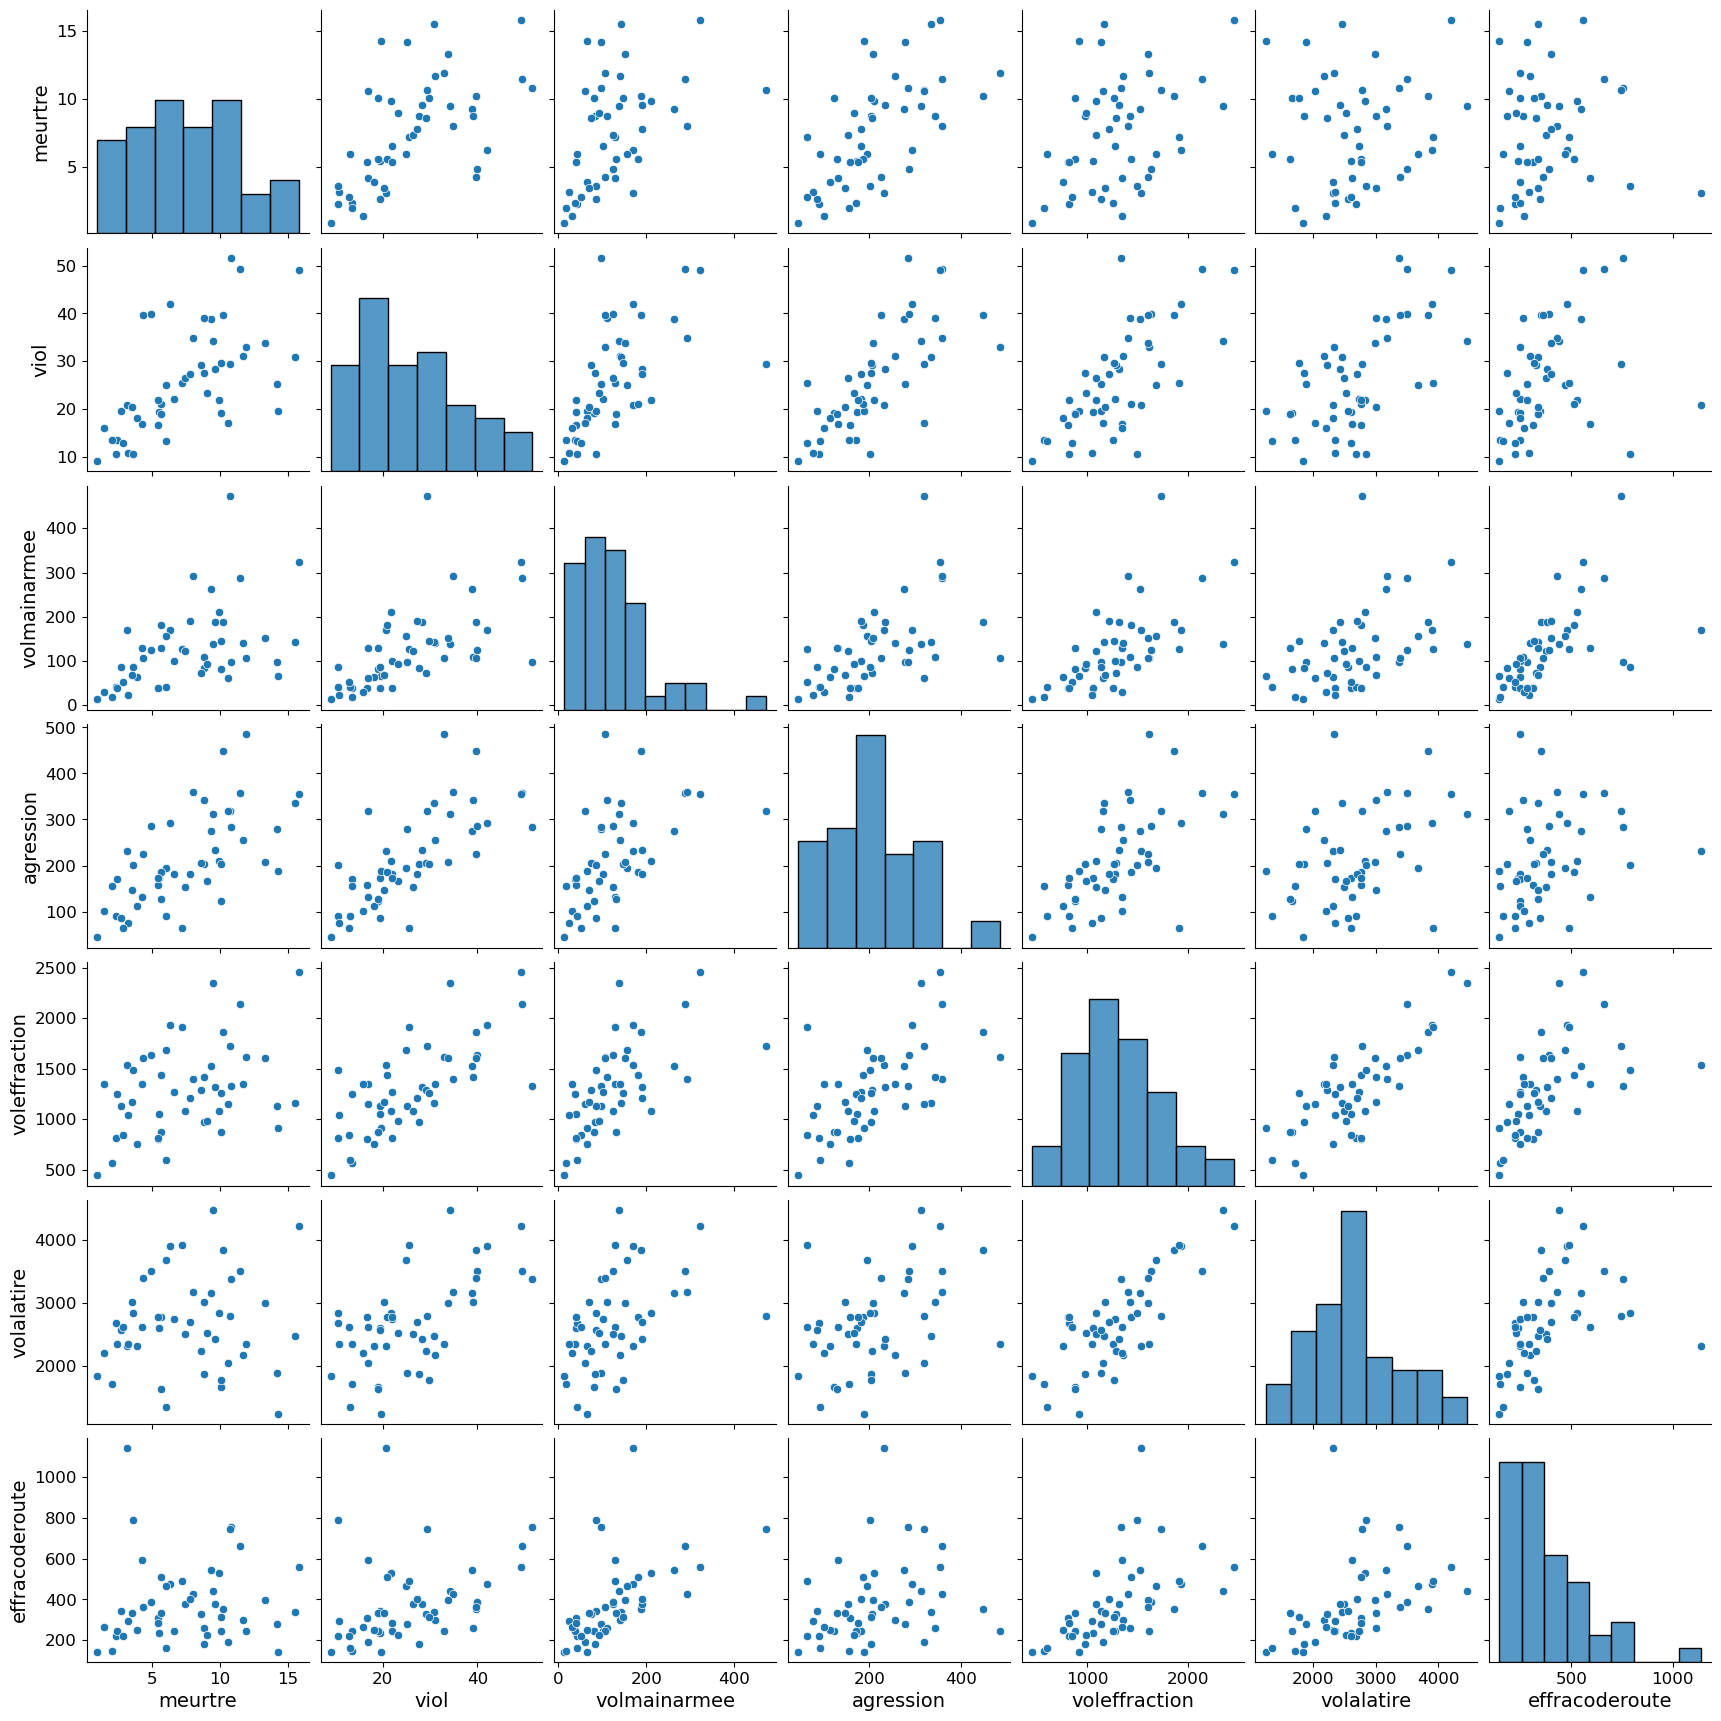

In [10]:
# pairplot
sns.pairplot(df) ;

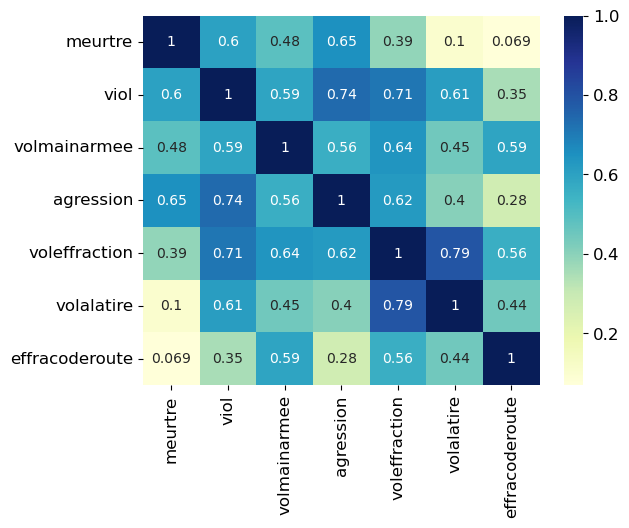

In [11]:
# heatmap with seaborn
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

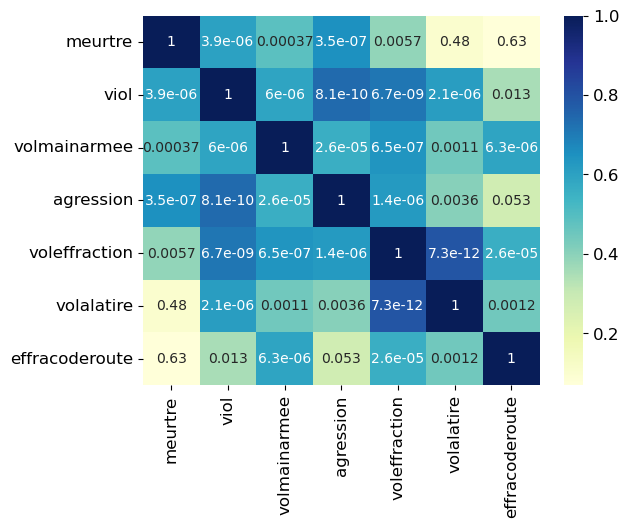

In [12]:
# heatmap with pearson correlation pvalues
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

sns.heatmap(df.corr(), cmap="YlGnBu", annot=df.corr(method=pearsonr_pval))
plt.show()

## Define the number of factors to work on

In [13]:
a = np.matrix(acp.eig_)
pd.DataFrame(a, index=['eigenvalue','variance.percent','cumulative.variance.percent'], columns=['dim1','dim2','dim3','dim4','dim5','dim6','dim7'])

,dim1,dim2,dim3,dim4,dim5,dim6,dim7
eigenvalue,4.114960,1.238722,0.725817,0.316432,0.257974,0.222039,0.124056
variance.percent,58.785136,17.696026,10.368809,4.520458,3.685349,3.171992,1.772229
cumulative.variance.percent,58.785136,76.481162,86.849971,91.370429,95.055778,98.227771,100.000000


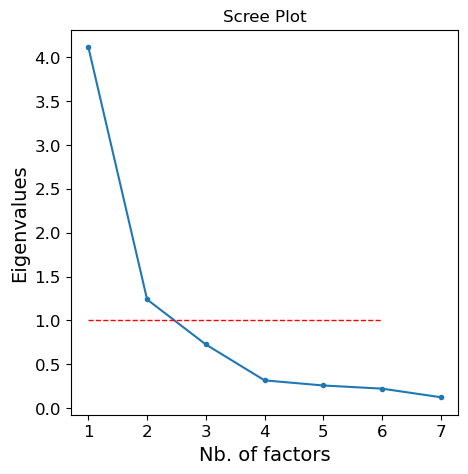

In [14]:
# print screen plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,6],[1,1],"r--",linewidth=1)

plt.show()

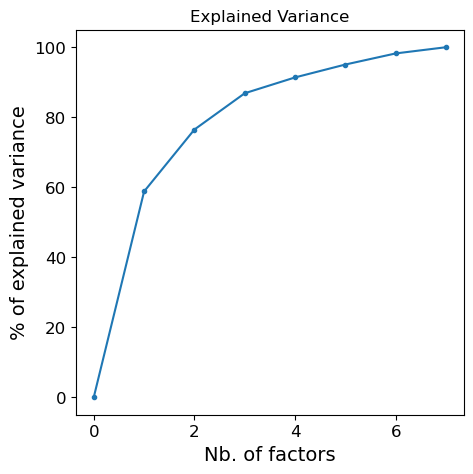

In [15]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [16]:
# Computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.700


thresholds for the broken sticks: [2.59285714 1.59285714 1.09285714 0.75952381 0.50952381 0.30952381
 0.14285714]


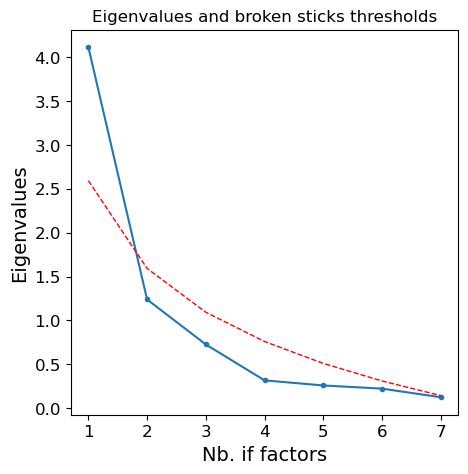

In [17]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

## Variables representation

In [18]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|     :     |--------

<function matplotlib.pyplot.show(close=None, block=None)>

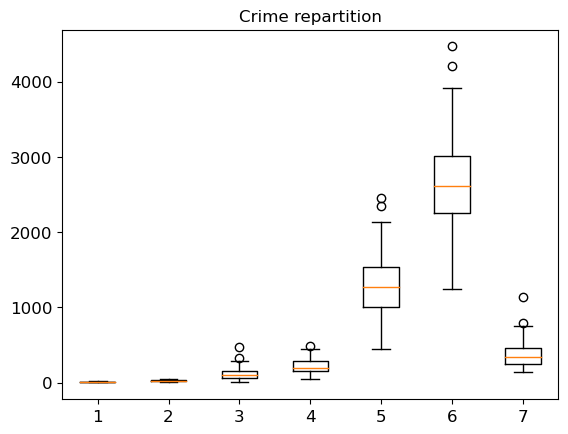

<Figure size 1000x700 with 0 Axes>

In [78]:
plt.boxplot(df)
plt.title('Crime repartition')
plt.figure(figsize =(10,7))
plt.show

In [23]:
df.head()

,meurtre,viol,volmainarmee,agression,voleffraction,volalatire,effracoderoute
netats,,,,,,,
Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


<AxesSubplot:>

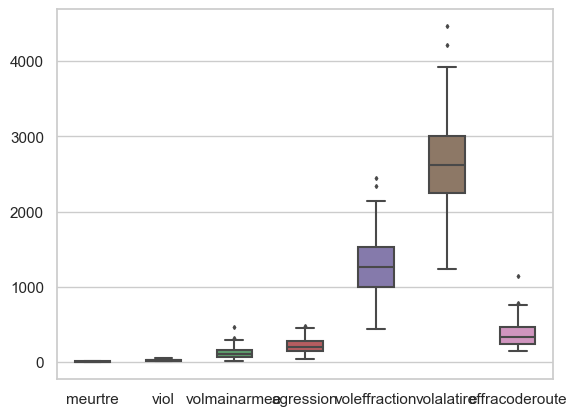

In [40]:
sb.boxplot(data=df, width=0.5, dodge = True, fliersize = 2, ax = None)

In [68]:
# Correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:2],index=df.columns, columns=['F1','F2']))

                      F1        F2
meurtre        -0.609127 -0.700258
viol           -0.875840 -0.188578
volmainarmee   -0.805076  0.047020
agression      -0.804622 -0.382340
voleffraction  -0.892875  0.226314
volalatire     -0.724917  0.447773
effracoderoute -0.598777  0.559184


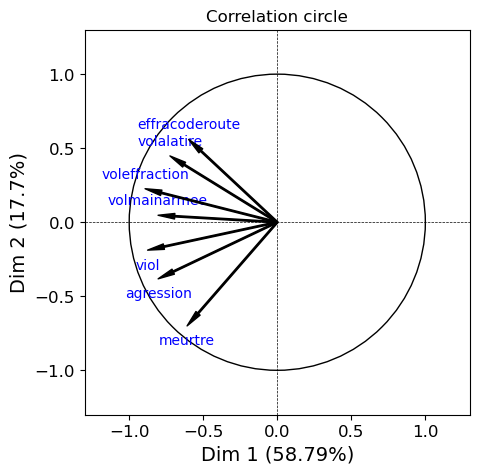

In [33]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))

In [34]:
# Cos² of the variables on the two first factors
print(pd.DataFrame(acp.col_cos2_[:,:2],index=df.columns, columns=['F1','F2']))

                      F1        F2
meurtre         0.371036  0.490361
viol            0.767095  0.035562
volmainarmee    0.648148  0.002211
agression       0.647417  0.146184
voleffraction   0.797226  0.051218
volalatire      0.525504  0.200500
effracoderoute  0.358534  0.312687


In [35]:
# Cumulated Cos² on the two first factors
print(pd.DataFrame(np.cumsum(acp.col_cos2_[:,:2],axis=1),index=df.columns, columns=['F1','F2']))

                      F1        F2
meurtre         0.371036  0.861397
viol            0.767095  0.802656
volmainarmee    0.648148  0.650359
agression       0.647417  0.793601
voleffraction   0.797226  0.848443
volalatire      0.525504  0.726005
effracoderoute  0.358534  0.671220


In [36]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=df.columns, columns=['F1','F2']))

                       F1         F2
meurtre          9.016757  39.586048
viol            18.641615   2.870826
volmainarmee    15.751016   0.178481
agression       15.733257  11.801159
voleffraction   19.373837   4.134739
volalatire      12.770583  16.186068
effracoderoute   8.712935  25.242679


## Instances representation

In [37]:
# individuals factor coordinates on the first plan (of the two first axes)
print(pd.DataFrame(acp.row_coord_[:,:2],index=df.index))

                       0         1
netats                            
Alabama         0.050387 -2.117383
Alaska         -2.446100  0.168214
Arizona        -3.044739  0.853523
Arkansas        1.065115 -1.359100
California     -4.327295  0.144641
Colorado       -2.534768  0.925902
Connecticut     0.546825  1.516471
Delaware       -0.974374  1.309908
Florida        -3.143346 -0.610048
Georgia        -0.495386 -1.394807
Hawaii         -0.831488  1.842436
Idaho           1.446997 -0.008087
Illinois       -0.518110  0.095187
Indiana         0.504971  0.000026
Iowa            2.607771  0.833127
Kansas          0.640504 -0.028326
Kentucky        1.744441 -1.158273
Louisiana      -1.131575 -2.104424
Maine           1.844852  0.584661
Maryland       -2.204959 -0.196719
Massachusetts  -0.988373  2.657766
Michigan       -2.296415  0.156446
Minnesota       1.570123  1.067163
Mississippi     1.522662 -2.572569
Missouri       -0.562015 -0.564181
Montana         1.684948  0.273743
Nebraska        2.17

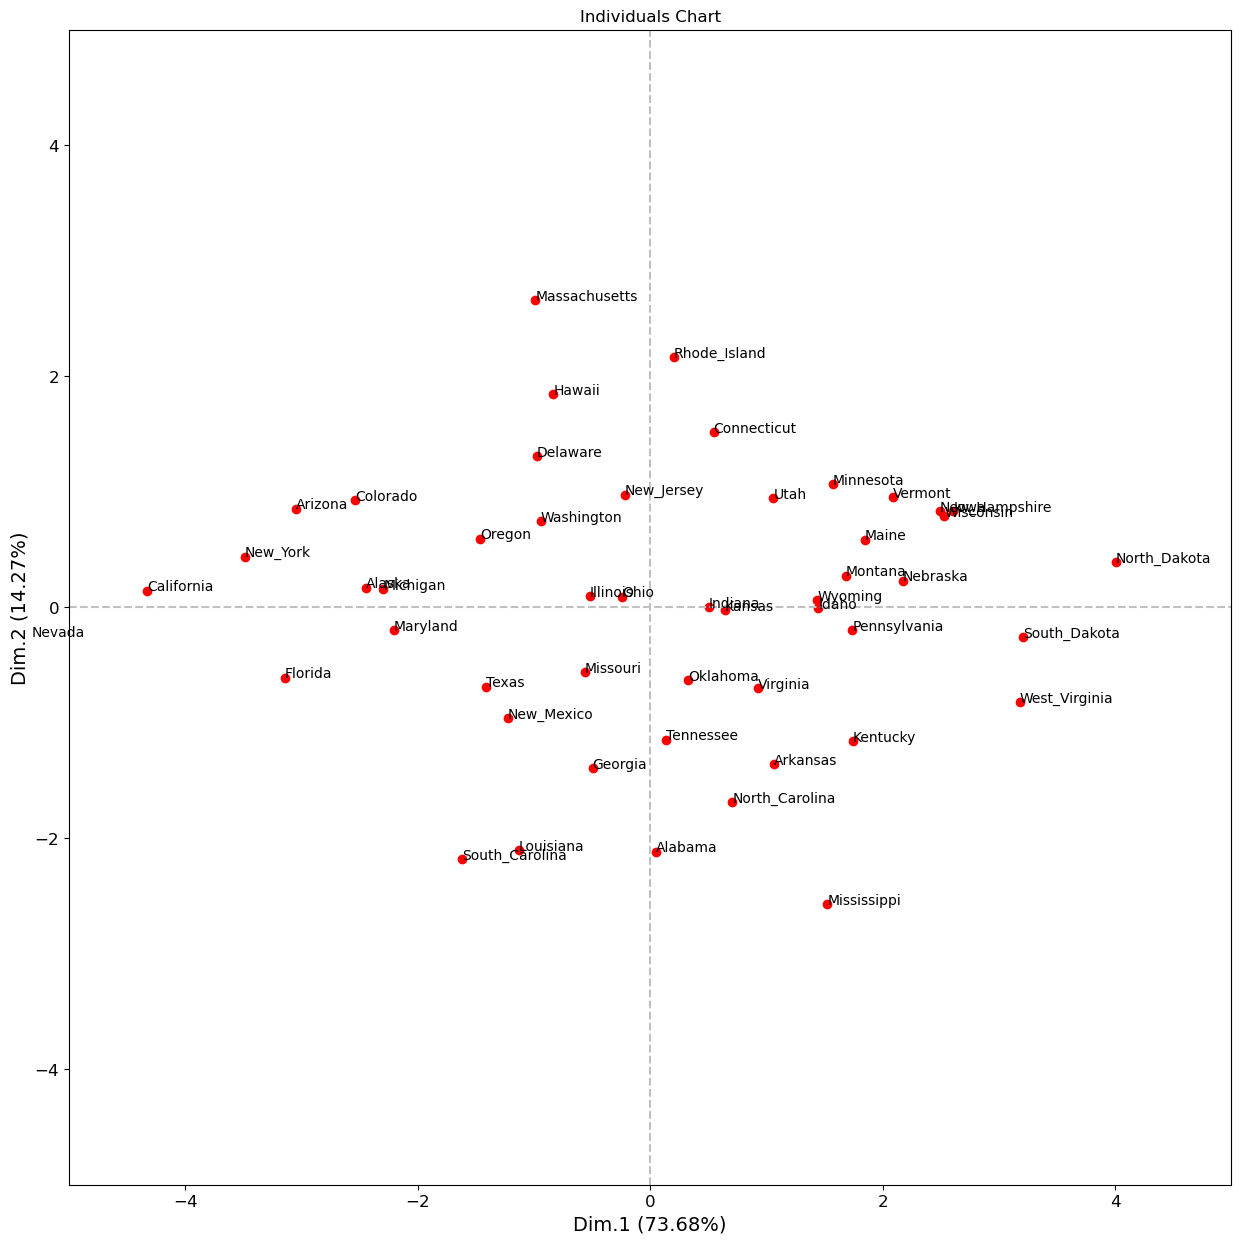

In [64]:
# plot with square scales
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'ro')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Individuals Chart")

for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],df.index[i])
    
plt.show()

In [40]:
# standardized data points
Z = (df.values - acp.means_) / acp.std_

# distance to origin from the standardized data
disto = np.apply_along_axis(arr=Z,axis=1,func1d=lambda x: np.sum(x**2))

# distance to origin from the factor coordinates
distoBis = np.sum(acp.row_coord_**2,axis=1)

# compare in a dataframe : distance should be preserved
print(pd.DataFrame(np.transpose(np.array([disto,distoBis])),index=df.index, columns=['original','factor']))

                 original     factor
netats                              
Alabama          5.266560   5.266560
Alaska          12.105650  12.105650
Arizona         14.397413  14.397413
Arkansas         3.233514   3.233514
California      19.193089  19.193089
Colorado         8.848628   8.848628
Connecticut      3.357177   3.357177
Delaware         3.335068   3.335068
Florida         12.912639  12.912639
Georgia          2.410914   2.410914
Hawaii           7.663926   7.663926
Idaho            2.558940   2.558940
Illinois         2.446953   2.446953
Indiana          0.633147   0.633147
Iowa             8.153845   8.153845
Kansas           0.835077   0.835077
Kentucky         5.306802   5.306802
Louisiana        6.485680   6.485680
Maine            4.854723   4.854723
Maryland         7.278708   7.278708
Massachusetts   18.240427  18.240427
Michigan         6.173498   6.173498
Minnesota        3.859666   3.859666
Mississippi     10.258247  10.258247
Missouri         1.098122   1.098122
M

In [41]:
# cumulated Cos² on the two first axes
print(pd.DataFrame(np.cumsum(acp.row_cos2_[:,:2],axis=1),index=df.index, columns=['F1','F2']))

                      F1        F2
netats                            
Alabama         0.000482  0.851761
Alaska          0.494265  0.496603
Arizona         0.643896  0.694496
Arkansas        0.350848  0.922100
California      0.975637  0.976727
Colorado        0.726107  0.822991
Connecticut     0.089068  0.774073
Delaware        0.284673  0.799163
Florida         0.765190  0.794011
Georgia         0.101790  0.908740
Hawaii          0.090211  0.533139
Idaho           0.818229  0.818255
Illinois        0.109703  0.113406
Indiana         0.402743  0.402743
Iowa            0.834020  0.919146
Kansas          0.491267  0.492228
Kentucky        0.573429  0.826236
Louisiana       0.197429  0.880257
Maine           0.701066  0.771477
Maryland        0.667954  0.673271
Massachusetts   0.053556  0.440812
Michigan        0.854219  0.858184
Minnesota       0.638730  0.933791
Mississippi     0.226013  0.871163
Missouri        0.287637  0.577497
Montana         0.769452  0.789761
Nebraska        0.93

In [42]:
# contributions on the two first factors
lig_ctr = (acp.row_coord_[:,:2]**2)/(n*acp.eig_[0][:2])*100
print(pd.DataFrame(lig_ctr,index=df.index, columns=['F1','F2']))

                       F1            F2
netats                                 
Alabama          0.001234  7.238609e+00
Alaska           2.908122  4.568555e-02
Arizona          4.505725  1.176216e+00
Arkansas         0.551389  2.982353e+00
California       9.101175  3.377845e-02
Colorado         3.122777  1.384160e+00
Connecticut      0.145332  3.712995e+00
Delaware         0.461440  2.770370e+00
Florida          4.802295  6.008750e-01
Georgia          0.119276  3.141119e+00
Hawaii           0.336029  5.480761e+00
Idaho            1.017653  1.055965e-04
Illinois         0.130469  1.462894e-02
Indiana          0.123936  1.116585e-09
Iowa             3.305243  1.120672e+00
Kansas           0.199392  1.295499e-03
Kentucky         1.479030  2.166097e+00
Louisiana        0.622345  7.150277e+00
Maine            1.654199  5.519052e-01
Maryland         2.363010  6.248121e-02
Massachusetts    0.474795  1.140485e+01
Michigan         2.563097  3.951710e-02
Minnesota        1.198207  1.838728e+00


In [43]:
# check with fanalysis.pca
print(pd.DataFrame(acp.row_contrib_[:,:2],index=df.index, columns=['F1','F2']))

                       F1            F2
netats                                 
Alabama          0.001234  7.238609e+00
Alaska           2.908122  4.568555e-02
Arizona          4.505725  1.176216e+00
Arkansas         0.551389  2.982353e+00
California       9.101175  3.377845e-02
Colorado         3.122777  1.384160e+00
Connecticut      0.145332  3.712995e+00
Delaware         0.461440  2.770370e+00
Florida          4.802295  6.008750e-01
Georgia          0.119276  3.141119e+00
Hawaii           0.336029  5.480761e+00
Idaho            1.017653  1.055965e-04
Illinois         0.130469  1.462894e-02
Indiana          0.123936  1.116585e-09
Iowa             3.305243  1.120672e+00
Kansas           0.199392  1.295499e-03
Kentucky         1.479030  2.166097e+00
Louisiana        0.622345  7.150277e+00
Maine            1.654199  5.519052e-01
Maryland         2.363010  6.248121e-02
Massachusetts    0.474795  1.140485e+01
Michigan         2.563097  3.951710e-02
Minnesota        1.198207  1.838728e+00


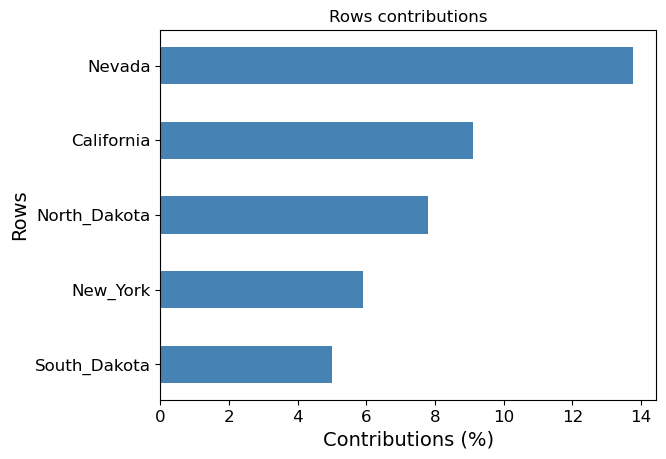

In [44]:
# plot : contributions to the first factor
acp.plot_row_contrib(num_axis=1,nb_values=5)

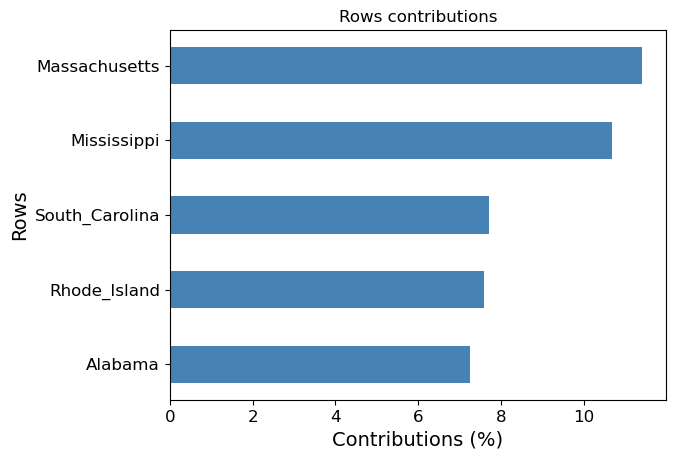

In [45]:
# plot : contributions to the second factor
acp.plot_row_contrib(num_axis=2,nb_values=5)

## Transition relationships

In [47]:
# Coordinates of individuals from variables - Factor 1
f1 = 1/math.sqrt(acp.eig_[0][0]) * np.dot(Z,acp.col_coord_[:,0])

# print and check coordinates
print(pd.DataFrame(np.transpose(np.array([f1,acp.row_coord_[:,0]])),index=df.index, columns=['transition','actual']))

                transition    actual
netats                              
Alabama           0.050387  0.050387
Alaska           -2.446100 -2.446100
Arizona          -3.044739 -3.044739
Arkansas          1.065115  1.065115
California       -4.327295 -4.327295
Colorado         -2.534768 -2.534768
Connecticut       0.546825  0.546825
Delaware         -0.974374 -0.974374
Florida          -3.143346 -3.143346
Georgia          -0.495386 -0.495386
Hawaii           -0.831488 -0.831488
Idaho             1.446997  1.446997
Illinois         -0.518110 -0.518110
Indiana           0.504971  0.504971
Iowa              2.607771  2.607771
Kansas            0.640504  0.640504
Kentucky          1.744441  1.744441
Louisiana        -1.131575 -1.131575
Maine             1.844852  1.844852
Maryland         -2.204959 -2.204959
Massachusetts    -0.988373 -0.988373
Michigan         -2.296415 -2.296415
Minnesota         1.570123  1.570123
Mississippi       1.522662  1.522662
Missouri         -0.562015 -0.562015
M

In [48]:
# Coordinates of variables from individuals - Factor 1
r1 = 1/(n*math.sqrt(acp.eig_[0][0])) * np.dot(np.transpose(Z),acp.row_coord_[:,0])

# print and check correlations
print(pd.DataFrame(np.transpose(np.array([r1,acp.col_coord_[:,0]])),index=df.columns, columns=['transition','actual']))

                transition    actual
meurtre          -0.609127 -0.609127
viol             -0.875840 -0.875840
volmainarmee     -0.805076 -0.805076
agression        -0.804622 -0.804622
voleffraction    -0.892875 -0.892875
volalatire       -0.724917 -0.724917
effracoderoute   -0.598777 -0.598777
